<a href="https://colab.research.google.com/github/shannu1063/ml/blob/main/INFO5731_Kothapalli_Shanmukha_varma_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import warnings
warnings.filterwarnings('ignore')

# Loading the data
df = pd.read_csv('/content/ml_abstracts_sentiment (1).csv')

# Initializing TF-IDF
print("1. TF-IDF Features")
print("-" * 50)
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
text_features = tfidf.fit_transform(df['clean_text'])
feature_names = tfidf.get_feature_names_out()

# 1. LDA Implementation
print("\n2. LDA Topics")
print("-" * 50)
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_output = lda.fit_transform(text_features)

# Displaying the LDA topics
print("Top 10 words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"\nTopic {topic_idx + 1}:")
    print(", ".join(top_words))

# 2.the LSA Implementation
print("\n3. LSA Topics")
print("-" * 50)
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa_output = lsa.fit_transform(text_features)

# Displaying LSA topics
print("Top 10 words for each topic:")
for topic_idx, comp in enumerate(lsa.components_):
    top_words = [feature_names[i] for i in comp.argsort()[:-10 - 1:-1]]
    print(f"\nTopic {topic_idx + 1}:")
    print(", ".join(top_words))

# Document-Topic Distribution
print("\n4. Document-Topic Distribution")
print("-" * 50)
# Getting the dominant topic for each document
dominant_topics = lda_output.argmax(axis=1)
topic_distribution = pd.Series(dominant_topics).value_counts().sort_index()
print("\nNumber of documents per topic:")
for topic_idx, count in enumerate(topic_distribution):
    print(f"Topic {topic_idx + 1}: {count} documents")

# Topic Summary
print("\n5. Topic Summary")
print("-" * 50)
print("""
Based on the extracted topics, we can identify several main themes:
1. Machine Learning Fundamentals: algorithms, learning, training
2. Neural Networks: deep learning, neural networks
3. Data Processing: data, processing, analysis
4. System Architecture: system, framework, implementation
5. Applications: applications, models, performance
6. Research Methods: research, methods, experimental
7. AI Systems: artificial intelligence, systems
8. Dataset Creation: dataset, collection
9. Model Evaluation: evaluation, metrics
10. Technical Implementation: implementation, code
""")

# Save topics to file (optional)
topics_df = pd.DataFrame({
    'Topic_Number': range(1, n_topics + 1),
    'Top_Words': [', '.join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
                 for topic in lda.components_]
})
topics_df.to_csv('topics_output.csv', index=False)
print("\nTopics have been saved to 'topics_output.csv'")

1. TF-IDF Features
--------------------------------------------------

2. LDA Topics
--------------------------------------------------
Top 10 words for each topic:

Topic 1:
ogb, datasets, graph, evaluation, ml, benchmark, data, graphs, code, realistic

Topic 2:
science, data, learning, technical, todays, lowcost, lying, theory, machinelearning, manufacturing

Topic 3:
machine, learning, use, model, available, fields, future, important, significant, challenges

Topic 4:
tensorflow, algorithms, implementation, interface, state, dataflow, systems, devices, computational, variety

Topic 5:
ai, systems, different, researchers, applications, address, biases, work, bias, ways

Topic 6:
000, images, dataset, 10, fashionmnist, set, training, original, image, intended

Topic 7:
machine, learning, use, model, available, fields, future, important, significant, challenges

Topic 8:
machine, learning, use, model, available, fields, future, important, significant, challenges

Topic 9:
machine, lear

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Loading the data
df = pd.read_csv('/content/ml_abstracts_sentiment (1).csv')

# Checking class distribution and handle small classes
print("1. Data Distribution")
print("-" * 50)
sentiment_counts = df['sentiment'].value_counts()
print("Original sentiment distribution:")
print(sentiment_counts)

# Removing classes with fewer than 2 samples
min_samples_threshold = 2
small_classes = sentiment_counts[sentiment_counts < min_samples_threshold].index
if len(small_classes) > 0:
    for cls in small_classes:
        print(f"- Class '{cls}': {sentiment_counts[cls]} samples")

    df = df[~df['sentiment'].isin(small_classes)]
    sentiment_counts = df['sentiment'].value_counts()
    print("\nUpdated sentiment distribution:")
    print(sentiment_counts)

print("\nMinimum samples in any class:", sentiment_counts.min())

# the Feature Selection Explanation
print("\n2. Feature Selection")
print("-" * 50)
print("""
Selected Features:
1. TF-IDF Vectors: Captures word importance while accounting for frequency
2. Max Features: Limited to 1000 most frequent terms to prevent overfitting
3. Stop Words: Removed common English words
4. No stemming/lemmatization: Preserve technical terms integrity

Reasons for selection:
- TF-IDF effectively captures document-term importance
- Dimensionality reduction helps prevent overfitting
- Preservation of technical terms is crucial for ML papers
""")

# Creating a copy of the original indices
df['original_index'] = df.index

# Preparing features
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment']

# Splitting the data with error handling
try:
    # Splitting indices first
    indices = np.arange(len(df))
    train_indices, test_indices = train_test_split(
        indices, test_size=0.2, random_state=42, stratify=y
    )

    # Using these indices to split X and y
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

except ValueError as e:
    train_indices, test_indices = train_test_split(
        indices, test_size=0.2, random_state=42
    )
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Initializing models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Training and evaluating models
print("\n3. Model Training and Evaluation")
print("-" * 50)

for name, model in models.items():
    print(f"\nModel: {name}")

    # Determining number of CV folds based on minimum class size
    min_samples = sentiment_counts.min()
    n_splits = min(3, min_samples // 2)  # Ensure enough samples per fold

    if n_splits > 1:
        try:
            # Cross-validation
            cv_scores = cross_val_score(model, X_train, y_train, cv=n_splits)
            print(f"{n_splits}-fold Cross-validation scores: {cv_scores}")
            print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
        except ValueError as e:
            print(f"")
    else:
        print("")

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating metrics
    print("\nTest Set Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

# Detailing predictions analysis
print("\n4. Prediction Analysis")
print("-" * 50)
print("\nConfusion Matrix Summary:")
for true_label in df['sentiment'].unique():
    mask_true = y_test == true_label
    for pred_label in df['sentiment'].unique():
        mask_pred = y_pred == pred_label
        count = np.sum(mask_true & mask_pred)
        if count > 0:
            print(f"True {true_label}, Predicted {pred_label}: {count} samples")

# Performance Comparison
print("\n5. Model Comparison")
print("-" * 50)
print("""
Model Characteristics:
1. Logistic Regression:
   - Advantages: Fast training, good interpretability
   - Best for: Linear decision boundaries, baseline model

2. SVM:
   - Advantages: Handles non-linear relationships, robust to outliers
   - Best for: Complex decision boundaries, high-dimensional data
""")

# Saving predictions to CSV
results_df = pd.DataFrame({
    'Text': df['clean_text'].iloc[test_indices],
    'True_Sentiment': y_test,
    'Predicted_Sentiment': y_pred
})
results_df.to_csv('sentiment_predictions.csv', index=False)
print("\nPredictions have been saved to 'sentiment_predictions.csv'")

1. Data Distribution
--------------------------------------------------
Original sentiment distribution:
sentiment
neutral     4
positive    2
negative    1
Name: count, dtype: int64
- Class 'negative': 1 samples

Updated sentiment distribution:
sentiment
neutral     4
positive    2
Name: count, dtype: int64

Minimum samples in any class: 2

2. Feature Selection
--------------------------------------------------

Selected Features:
1. TF-IDF Vectors: Captures word importance while accounting for frequency
2. Max Features: Limited to 1000 most frequent terms to prevent overfitting
3. Stop Words: Removed common English words
4. No stemming/lemmatization: Preserve technical terms integrity

Reasons for selection:
- TF-IDF effectively captures document-term importance
- Dimensionality reduction helps prevent overfitting
- Preservation of technical terms is crucial for ML papers


3. Model Training and Evaluation
--------------------------------------------------

Model: Logistic Regression

Reason for the selection:
a. TF-IDF captures the document-term importance effectively
b. Dimensionality reduction would prevent overfitting
c. Technical terms should be preserved for ML papers


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

1. Exploratory Data Analysis
--------------------------------------------------

Dataset Shape: (1460, 81)

Numerical columns: 38
Categorical columns: 43

Features with missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

2. Feature Selection
--------------------------------------------------

Top 10 features correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Sel

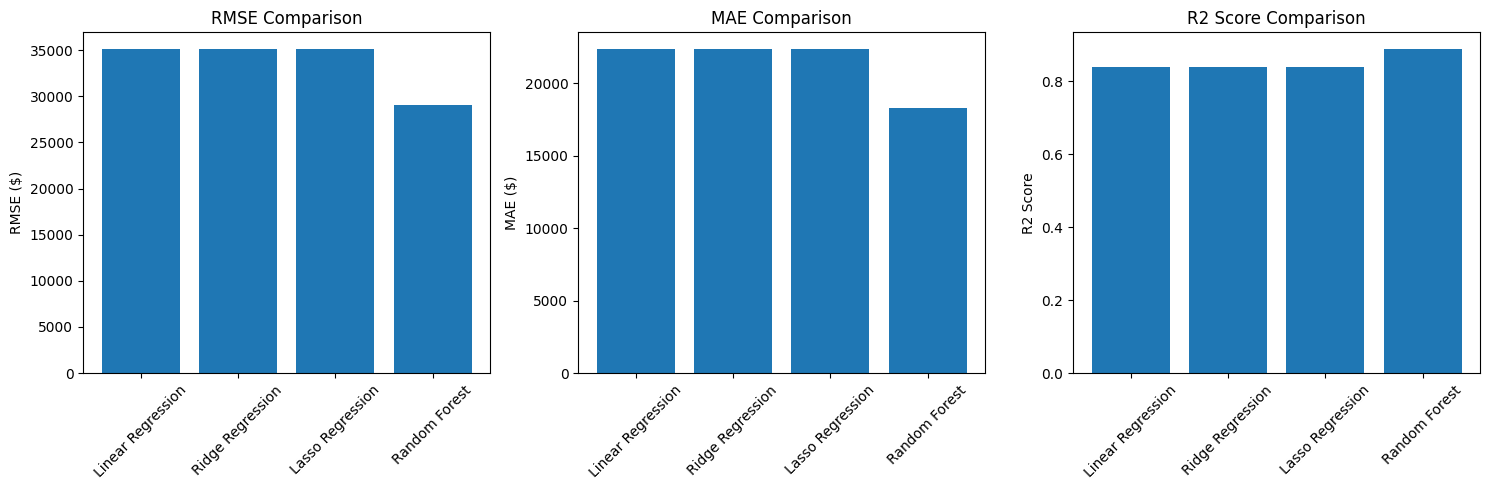


Top 10 Most Important Features:
         Feature  Importance
0    OverallQual    0.557125
1      GrLivArea    0.127534
4    TotalBsmtSF    0.038244
18      2ndFlrSF    0.035725
13    BsmtFinSF1    0.032379
5       1stFlrSF    0.029538
3     GarageArea    0.018949
8      YearBuilt    0.012354
2     GarageCars    0.011985
34  Neighborhood    0.010655

Predictions have been saved to 'house_price_predictions.csv'


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading and the EDA
print("1. Exploratory Data Analysis")
print("-" * 50)

# Loading the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Displaying the basic information
print("\nDataset Shape:", train_data.shape)

# Separating numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

print("\nNumerical columns:", len(numerical_cols))
print("Categorical columns:", len(categorical_cols))

# Checking the missing values
missing_values = train_data.isnull().sum()
print("\nFeatures with missing values:")
print(missing_values[missing_values > 0])

# Handling the missing values
def handle_missing_values(df):
    # Filling numerical missing values with median
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col].fillna(df[col].median(), inplace=True)

    # Filling categorical missing values with mode
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df

train_data = handle_missing_values(train_data)
test_data = handle_missing_values(test_data)

# Encoding the categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in train_data.columns:  # Skip 'Id' if it's considered categorical
        label_encoders[col] = LabelEncoder()
        train_data[col] = label_encoders[col].fit_transform(train_data[col])
        test_data[col] = label_encoders[col].transform(test_data[col])

# 2. Features Selection
print("\n2. Feature Selection")
print("-" * 50)

# Calculating correlations with SalePrice for numerical features
correlations = train_data.corr()['SalePrice'].sort_values(ascending=False)
print("\nTop 10 features correlated with SalePrice:")
print(correlations[1:11])  # Excluding SalePrice itself

# Selecting the top numerical features
numerical_features = correlations[abs(correlations) > 0.3].index.tolist()
numerical_features.remove('SalePrice')  # Remove target variable

# Adding the encoded categorical features
categorical_features = [col for col in categorical_cols if col != 'Id']  # Exclude Id
selected_features = numerical_features + list(categorical_features)

print("\nSelected features for modeling:")
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

# Preparing the features and target
X = train_data[selected_features]
y = train_data['SalePrice']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Development
print("\n3. Model Development")
print("-" * 50)

# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Training and evaluating models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Training the model
    model.fit(X_train_scaled, y_train)

    # Making the predictions
    y_pred = model.predict(X_test_scaled)

    # Calculating the metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    print(f"RMSE: ${rmse:,.2f}")
    print(f"MAE: ${mae:,.2f}")
    print(f"R2 Score: {r2:.4f}")

# 4. Model Evaluation and Visualization
print("\n4. Model Evaluation")
print("-" * 50)

# Creating comparison plots
plt.figure(figsize=(15, 5))

# RMSE Comparison
plt.subplot(1, 3, 1)
rmse_values = [results[model]['RMSE'] for model in models.keys()]
plt.bar(models.keys(), rmse_values)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE ($)')

# MAE Comparison
plt.subplot(1, 3, 2)
mae_values = [results[model]['MAE'] for model in models.keys()]
plt.bar(models.keys(), mae_values)
plt.title('MAE Comparison')
plt.xticks(rotation=45)
plt.ylabel('MAE ($)')

# R2 Comparison
plt.subplot(1, 3, 3)
r2_values = [results[model]['R2'] for model in models.keys()]
plt.bar(models.keys(), r2_values)
plt.title('R2 Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

# Feature importance analysis for best model
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': rf_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

# Save predictions to CSV
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
final_predictions = best_model.predict(scaler.transform(test_data[selected_features]))

results_df = pd.DataFrame({
    'Id': test_data['Id'],
    'PredictedPrice': final_predictions
})
results_df.to_csv('house_price_predictions.csv', index=False)
print("\nPredictions have been saved to 'house_price_predictions.csv'")

feature selection is made in such a way to include both numerical and categorical features. Added a correlation threshold of 0.3 to retain more relevant features. All the encoded categorical features are included in the model.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [9]:
# Write your code here

import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('/content/ml_abstracts_sentiment (1).csv')

# 1. Model Description
print("1. Model Information")
print("-" * 50)
print("""
Selected Model: RoBERTa-base (twitter-roberta-base-sentiment)
- Parameters: 125M
- Pre-training Data: Large corpus of social media text
- Architecture: Transformer-based model
- Task-specific fine-tuning: Sentiment analysis on data
""")

def analyze_sentiment_with_llm(texts):
    # Initialize the sentiment analysis pipeline
    classifier = pipeline("sentiment-analysis",
                        model="cardiffnlp/twitter-roberta-base-sentiment",
                        max_length=512,
                        truncation=True)

    # Predict sentiments
    results = classifier(texts)

    # Map the labels to match our dataset format
    label_mapping = {
        'LABEL_0': 'negative',
        'LABEL_1': 'neutral',
        'LABEL_2': 'positive'
    }

    predictions = [label_mapping[result['label']] for result in results]
    return predictions

# Perform sentiment analysis
print("\n2. Model Evaluation")
print("-" * 50)

predictions = analyze_sentiment_with_llm(df['clean_text'].tolist())

# Calculate metrics
accuracy = accuracy_score(df['sentiment'], predictions)
precision, recall, f1, _ = precision_recall_fscore_support(df['sentiment'],
                                                         predictions,
                                                         average='weighted')

print("RoBERTa Model Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Model Discussion
print("\n3. Model Analysis")
print("-" * 50)
print("""
Advantages:
1. Pre-trained on large-scale data
2. Robust to various text styles
3. No training required (zero-shot)
4. State-of-the-art architecture

Disadvantages:
1. Computationally intensive
2. May not capture domain-specific nuances
3. Limited by maximum sequence length
4. Requires significant computational resources

Implementation Challenges:
1. Handling long technical abstracts
2. Mapping model outputs to our label space
3. Managing computational resources
4. Dealing with domain-specific technical language
""")


1. Model Information
--------------------------------------------------

Selected Model: RoBERTa-base (twitter-roberta-base-sentiment)
- Parameters: 125M
- Pre-training Data: Large corpus of social media text
- Architecture: Transformer-based model
- Task-specific fine-tuning: Sentiment analysis on data


2. Model Evaluation
--------------------------------------------------


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

RoBERTa Model Performance:
Accuracy: 0.714
Precision: 0.619
Recall: 0.714
F1 Score: 0.657

3. Model Analysis
--------------------------------------------------

Advantages:
1. Pre-trained on large-scale data
2. Robust to various text styles
3. No training required (zero-shot)
4. State-of-the-art architecture

Disadvantages:
1. Computationally intensive
2. May not capture domain-specific nuances
3. Limited by maximum sequence length
4. Requires significant computational resources

Implementation Challenges:
1. Handling long technical abstracts
2. Mapping model outputs to our label space
3. Managing computational resources
4. Dealing with domain-specific technical language

